In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold


In [2]:
red_q = pd.read_csv('winequality-red.csv', sep=';')
red_q_tv = red_q['quality']
red_q = red_q.drop('quality', axis=1)
white_q = pd.read_csv('winequality-white.csv', sep=';')
white_q_tv = white_q['quality']
white_q = white_q.drop('quality', axis=1)
# print(red_q)
#  red_q = red_q.
max_depth = 5
kf =  KFold(n_splits=5, shuffle=True)
scores_total = 0
for i , (train_index, test_index) in enumerate(kf.split(red_q)):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = red_q.iloc[train_index], red_q.iloc[test_index]
    y_train, y_test = red_q_tv.iloc[train_index], red_q_tv.iloc[test_index]
    regr_1 = DecisionTreeRegressor(max_depth=max_depth)
    tree = regr_1.fit(X_train, y_train)
    score  = tree.score(X_test, y_test)
    scores_total += score
    print(f'The score for fold {i} is', score)
    print('-------------------')

print(f'average score for a max_depth of {max_depth} is {scores_total / kf.get_n_splits()}')

dtr = DecisionTreeRegressor(max_depth=max_depth)
tree_red = dtr.fit(red_q, red_q_tv)

dtr2= DecisionTreeRegressor(max_depth=max_depth)
tree_white = dtr2.fit(white_q, white_q_tv)
print('Red tree score is', tree_red.score(red_q, red_q_tv))
print('White tree score is', tree_white.score(white_q, white_q_tv))
import pickle
with open('red_tree_quality.pkl', 'wb') as f:
    pickle.dump(tree_red, f)
with open('white_tree_quality.pkl', 'wb') as f:
    pickle.dump(tree_white, f)

# pickle.dump(tree_red, open('red_tree.pkl', 'wb'))
# pickle.dump(tree_white, open('white_tree.pkl', 'wb'))


The score for fold 0 is 0.2821488413107959
-------------------
The score for fold 1 is 0.29787636975748133
-------------------
The score for fold 2 is 0.3358706114660618
-------------------
The score for fold 3 is 0.29437905265676445
-------------------
The score for fold 4 is 0.15915563314903314
-------------------
average score for a max_depth of 5 is 0.2738861016680273
Red tree score is 0.4627584023894983
White tree score is 0.3666891190470236


In [3]:
red_p = pd.read_csv('Red.csv', sep=',')
white_p = pd.read_csv('White.csv', sep=',')
red_p['Rating'] = red_p['Rating'] * 2
white_p['Rating'] = white_p['Rating'] * 2
with open('red_price.pkl', 'wb') as f:
    pickle.dump(red_p[['Rating', 'Price']], f)
with open('white_price.pkl', 'wb') as f:
    pickle.dump(white_p[['Rating', 'Price']], f)

# print(tree_red.predict(red_q.iloc[0:2]))
# print(red_p[['Rating', 'Price']])


MSE for exp model is 296.9164513640394


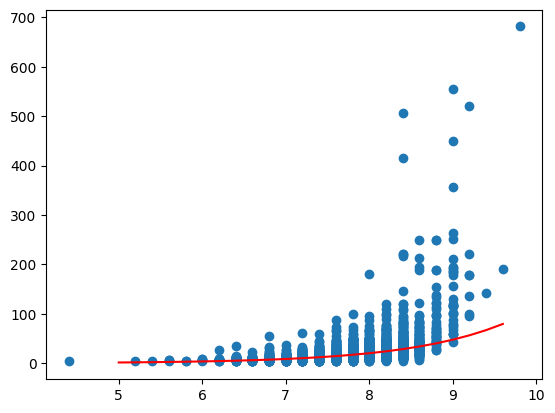

In [ ]:
plt.scatter(red_p['Rating'], red_p['Price'])
# plt.scatter(white_p['Rating'], white_p['Price'], color='white')
# red_p = red_p[red_p["Price"] < 2000] 
# fit = np.polyfit(red_p['Rating'], red_p['Price'], 1)

# fit = np.polyfit(red_p['Rating'], np.log(red_p['Price']), 1)
# print(fit)
fit_type = "hybrid"
if fit_type == "hybrid":
    red_p_bt = white_p[white_p['Rating'] <= 8.2]
    red_p_at = white_p[white_p['Rating'] >= 8.2]
    fit = np.polyfit(red_p_bt['Rating'], red_p_bt['Price'], 1)
    fit2 = np.polyfit(red_p_at['Rating'], np.log(red_p_at['Price']), 1)
    relat_bt = red_p_bt['Rating'].unique()
    relat_bt.sort()
    relat_at = red_p_at['Rating'].unique()
    relat_at.sort()
    plt.plot(relat_bt, relat_bt * fit[0] + fit[1], color='red')
    plt.plot(relat_at, np.exp(fit2[0] * relat_at + fit2[1]), color='red')

if fit_type == "linear":
    fit = np.polyfit(red_p['Rating'], red_p['Price'], 1)
    plt.plot(red_p['Rating'], red_p['Rating'] * fit[0] + fit[1], color='red')
if fit_type == "exp":
    fit = np.polyfit(red_p['Rating'], np.log(red_p['Price']), 1)
    relat = red_p['Rating'].unique()
    relat.sort()
    plt.plot(relat, np.exp(fit[0] * relat + fit[1]), color='red')
    # plt.plot(red_p['Rating'], np.exp(fit[0] * red_p['Rating'] + fit[1]), color='red')
mse  = np.mean((red_p_bt['Price'] - (red_p_bt['Rating'] * fit[0] + fit[1]))**2)
print(f"MSE for {fit_type} model is {mse}")
pickle.dump(fit, open('white_pred.pkl', 'wb'))

# exp = 709.56
# linear = 714.14
# hybrid = 315.64
# hybrid white = 105.84
# relat = pd.DataFrame(relat)
# relat = relat[relat['Rating'] == 5]
# relat.quantile(0.5)
# print(relat)
# plt.plot(relat, relat * fit[0] + fit[1], color='red')
# plt.plot(relat, np.exp(fit[0] * relat + fit[1]), color='red')
# plt.plot(red_p['Rating'].unique()., np.exp(fit[0] * red_p['Rating'].unique() + fit[1]), color='red')
plt.show()
